# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance.
Data scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [15]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [16]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

As with any dataset, the first steps are going to be data exploration, data cleaning and data Type Conversions.

1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [17]:
print(f'The dimensionality of the DataFrame ist : {data.shape}') , print(f'The column labels of the DataFrame are:\n{data.columns}')

The dimensionality of the DataFrame ist : (5391, 6)
The column labels of the DataFrame are:
Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')


(None, None)

In [18]:
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [19]:
print(f'Any duplicated values among the data? {data.duplicated().values.any()}')

Any duplicated values among the data? False


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [21]:
data.sample(n=5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5348,2225,5/5/2017,Chāi dàn zhuānjiā,"$23,000,000","$58,807,172",$0
1096,2427,6/3/1998,Twilight,"$20,000,000","$15,055,091","$15,055,091"
856,3634,3/5/1996,The Pallbearer,"$8,000,000","$5,656,388","$5,656,388"
2024,2690,5/9/2003,Dickie Roberts: Former Child Star,"$17,000,000","$23,734,486","$22,734,486"
4323,4425,1/15/2013,30 Nights Of Paranormal Activity With The Devi...,"$3,000,000",$0,$0


In [22]:
characters_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_clean:
  for char in characters_to_remove:
    data[col] = data[col].astype(str).str.replace(char, "", regex=True)
  data[col] = pd.to_numeric(data[col])

In [23]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


Convert the `Release_Date` column to a Pandas Datetime type.

In [24]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

In [25]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


The minimum domestic and worldwide revenue is $0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

In [26]:
data[data['USD_Production_Budget'] == 1100.00].Movie_Title

2427    My Date With Drew
Name: Movie_Title, dtype: object

In [27]:
data[data['USD_Production_Budget'] == 425000000.00].Movie_Title

3529    Avatar
Name: Movie_Title, dtype: object

# Investigating the Zero Revenue Films

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [28]:
zero_domestic = data[data['USD_Domestic_Gross']== 0.00]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')

Number of films that grossed $0 domestically 512


In [29]:
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [30]:
zero_worldwide = data[data['USD_Worldwide_Gross']== 0.00]
print(f'Number of films that grossed $0 Worldwide {len(zero_worldwide)}')

Number of films that grossed $0 Worldwide 357


In [31]:
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.
(technique 1)

In [32]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f'Number of International releases: {len(international_releases)}')
international_releases.sort_values('USD_Worldwide_Gross', ascending=False)

Number of International releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


technique 2

In [33]:
international_releases_1 = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of International releases: {len(international_releases_1)}')
international_releases_1.sort_values('USD_Worldwide_Gross', ascending=False)

Number of International releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,5000000,2199,0
3573,5015,2010-01-26,B-Girl,700000,1160,0
5103,4625,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926,0
4772,5005,2014-12-31,Destiny,750000,450,0


### Unreleased Films


* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [34]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [35]:
future_releases = data[data.Release_Date > scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [36]:
data_clean = data.drop(future_releases.index)
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [37]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f'percentage of films where the costs exceed the worldwide gross revenue: {(money_losing.shape[0]/data_clean.shape[0])*100} %')

percentage of films where the costs exceed the worldwide gross revenue: 37.27711738484398 %


# Seaborn for Data Viz: Bubble Charts

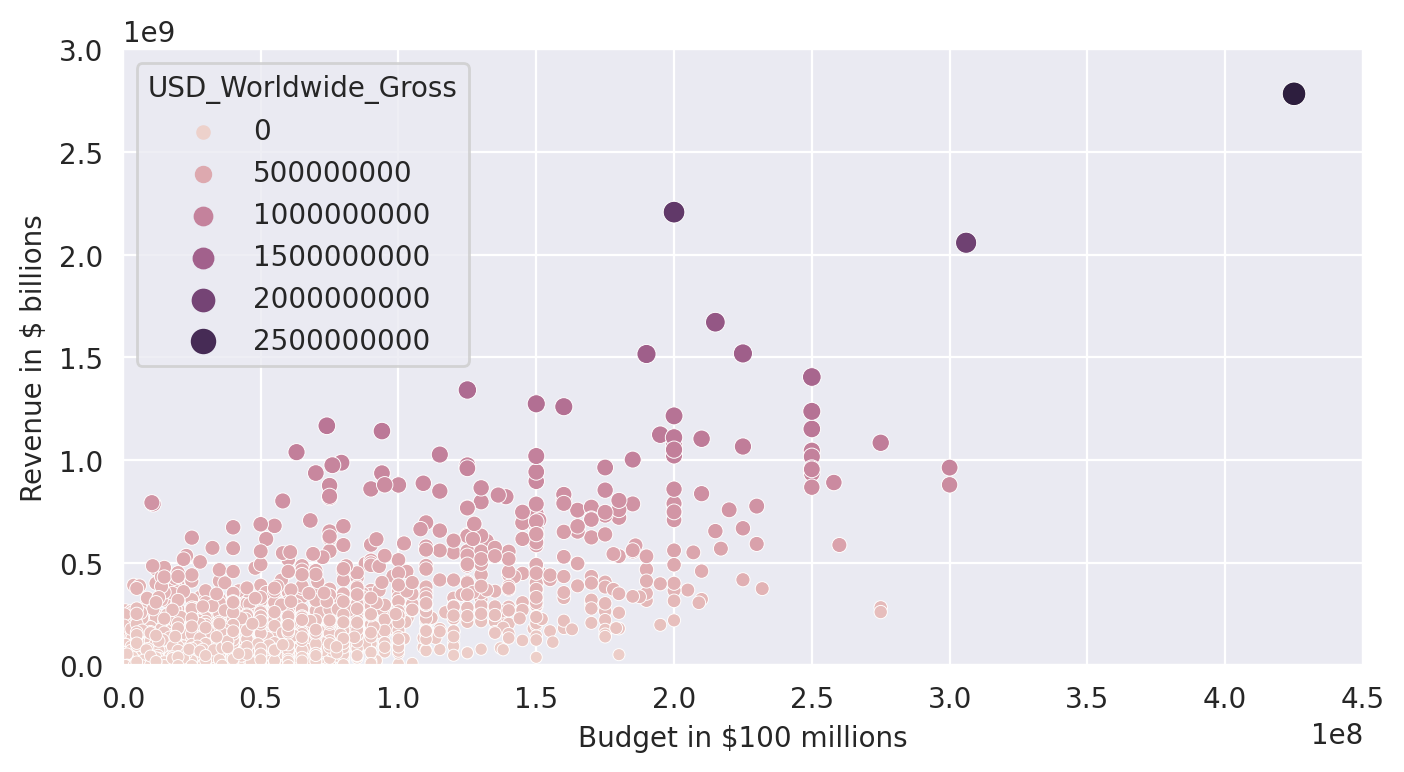

In [38]:
plt.figure(figsize=(8, 4), dpi=200)
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time




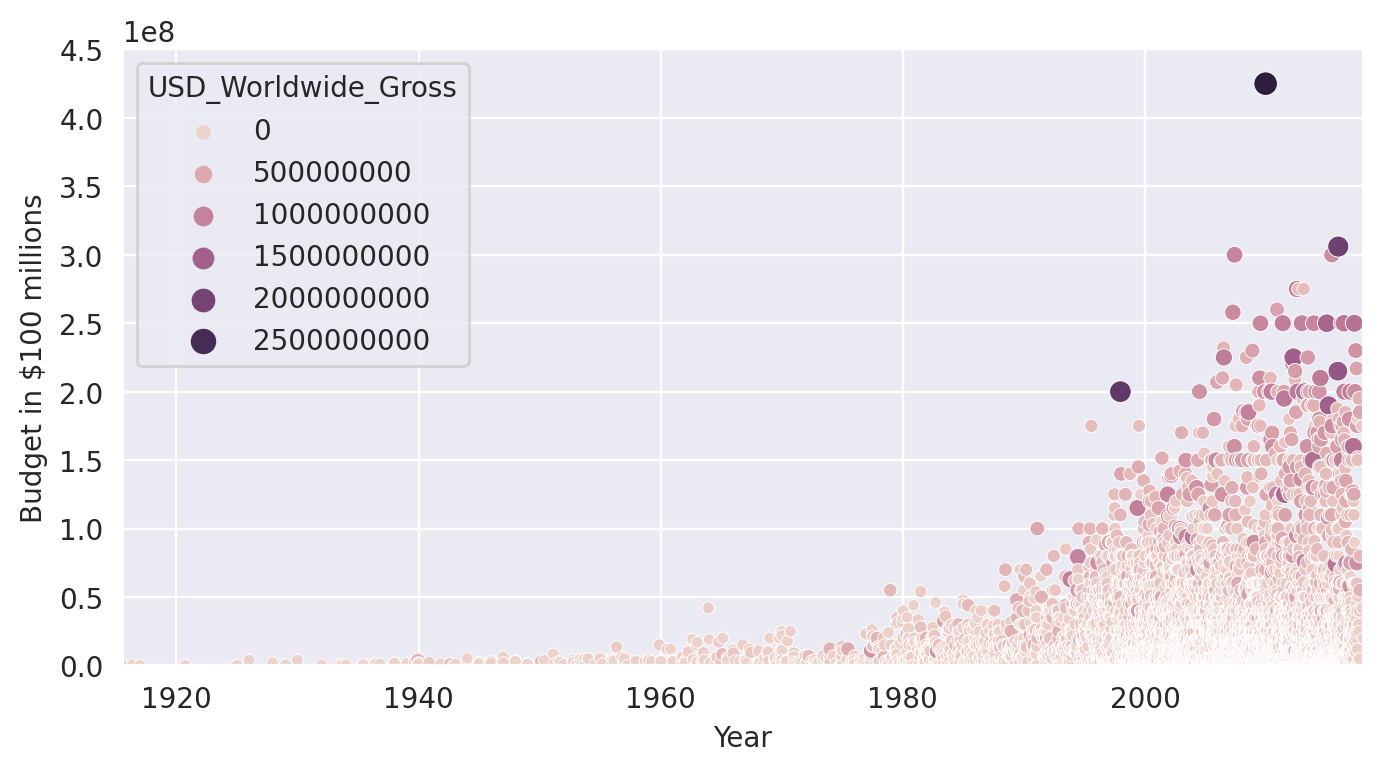

In [39]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

In our bubble charts, we've seen how massively the industry has changed over time, especially from the 1970s onwards.

# Converting Years to Decades Trick

Create a column that has the decade of the release.

In [40]:
#Grab all the years from the DatetimeIndex object using the .year property.

dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

#I will use the floor division by 10 and then multiplication by 10 to convert the release year to the release decade:
decades = (years//10)*10

#Add the decades as a Decade column to the data_clean DataFrame.
data_clean['Decade'] = decades
data_clean.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
3742,663,2010-09-24,Wall Street 2: Money Never Sleeps,70000000,137431619,52474616,2010
3692,465,2010-07-30,Cats & Dogs: The Revenge of Kitty Galore,85000000,114979922,45539292,2010
1075,4062,1998-03-27,No Looking Back,5000000,143273,143273,1990
3095,3824,2008-02-22,Die Fälscher,6250000,20199663,5488570,2000
4407,61,2013-06-21,World War Z,190000000,531514650,202359711,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [41]:
old_films = data_clean[data_clean.Decade <= 1969]
new_films = data_clean[data_clean.Decade > 1960]

old_films.shape[0], new_films.shape[0]

(153, 5231)

In [42]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [43]:
old_films[old_films.USD_Production_Budget == 42000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


In [44]:
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,231.00","5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00","31,811,437.73","90,683,497.56","41,841,922.35","2,000.19"
std,"1,549.33","40,758,580.67","170,424,978.36","66,702,734.68",9.58
min,1.00,"1,100.00",0.00,0.00,"1,970.00"
25%,"1,314.50","5,000,000.00","3,831,677.00","1,252,581.00","2,000.00"
50%,"2,629.00","18,000,000.00","28,544,120.00","17,510,118.00","2,000.00"
75%,"3,967.50","40,000,000.00","98,777,000.00","53,301,583.00","2,010.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"


# Seaborn Regression Plots

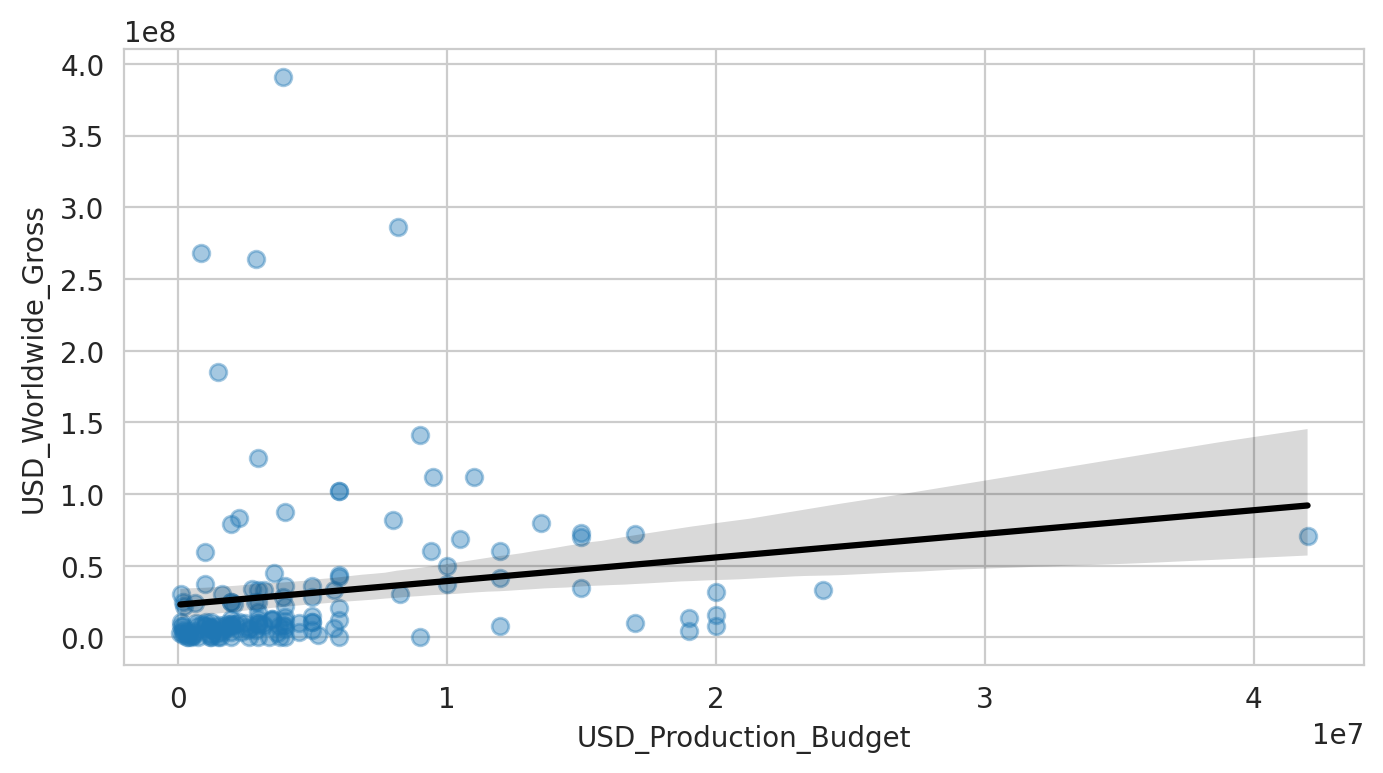

In [46]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong.

The scatter plot and linear regression line against the `new_films`.

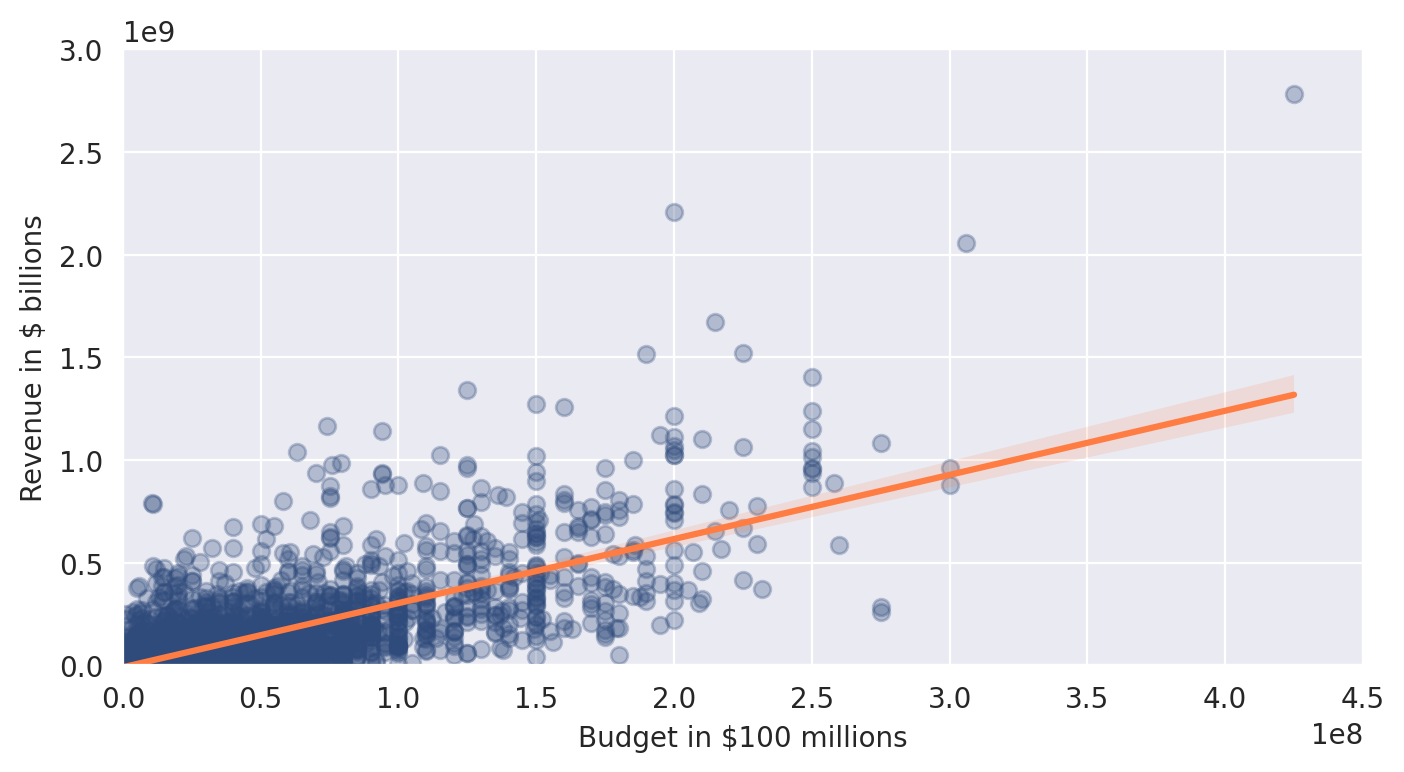

In [48]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

we can be pretty confident that prior to 1969,there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [55]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

#Theta zero
regression.intercept_ , regression.coef_

(array([-8650768.00661027]), array([[3.12259592]]))

In [56]:
# R-squared
regression.score(X, y)

0.5577032617720403

This means that our model explains about 56% of the variance in movie revenue. amazing!
(if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.)

A linear regression for the `old_films`

In [57]:
x= pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y= pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(x, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(x, y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The r-squared is: 0.02937258620576877


This makes sense considering how poorly our data points aligned with our line earlier.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

How much global revenue does our model estimate for a film with a budget of $350 million?

In [58]:
22821538 + 1.64771314 * 350000000

599521137.0

In [59]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
